In [ ]:
# Mount the drive 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_data.csv')   #Change Path to your Drive Directory accordingly.
data = data.drop(['address','Unnamed: 0'],axis = 1)
data["label"]= data["label"].replace(28, "white") 
data["label"]= data["label"].replace('28', "white") 
classes = data.label.unique()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(data)

        year  day  length  ...  neighbors        income            label
0       2017   11      18  ...          2  1.000500e+08  princetonCerber
1       2016  132      44  ...          1  1.000000e+08   princetonLocky
2       2016  246       0  ...          2  2.000000e+08  princetonCerber
3       2016  322      72  ...          2  7.120000e+07  princetonCerber
4       2016  238     144  ...          1  2.000000e+08   princetonLocky
...      ...  ...     ...  ...        ...           ...              ...
315195  2018  330       0  ...          2  2.503180e+09            white
315196  2018  330       0  ...          2  1.000000e+09            white
315197  2018  330       6  ...          1  3.000000e+08            white
315198  2018  330       0  ...          2  1.372746e+09            white
315199  2018  330       6  ...          2  2.397816e+09            white

[315200 rows x 9 columns]


In [ ]:
print('Value Counts:\n',data['label'].value_counts())
print('Total labels: ',len(data['label'].unique()))

Value Counts:
 white                          232374
paduaCryptoWall                 24780
montrealCryptoLocker            18630
princetonCerber                 18446
princetonLocky                  13250
montrealCryptXXX                 4838
montrealNoobCrypt                 966
montrealDMALockerv3               708
montrealDMALocker                 502
montrealSamSam                    124
montrealCryptoTorLocker2015       110
montrealGlobeImposter             110
montrealGlobev3                    68
montrealGlobe                      64
montrealWannaCry                   56
montrealRazy                       26
montrealAPT                        22
paduaKeRanger                      20
montrealFlyper                     18
montrealXTPLocker                  16
montrealVenusLocker                14
montrealXLockerv5.0                14
montrealCryptConsole               14
montrealEDA2                       12
montrealJigSaw                      8
paduaJigsaw                        

Log Transformations [Run only once :)]

In [ ]:
import numpy as np
eps = 0.001
data['income'] = np.log(data.pop('income')+eps)
data['weight'] = np.log(data.pop('weight')+eps)
data['count'] = np.log(data.pop('count')+eps)
data['looped'] = np.log(data.pop('looped')+eps)
data['neighbors'] = np.log(data.pop('neighbors')+eps)
data['length'] = np.log(data.pop('length')+eps)
data['day'] = np.log(data.pop('day')+eps)

print(data['length'].min())
print(data['length'].max())
print(data['count'].min())
print(data['count'].max())
print(data.looped.min())
print(data.looped.max())
print(data.neighbors.min())
print(data.neighbors.max())
print(data.income.min())
print(data.income.max())
print(data.weight.min())
print(data.weight.max())

-6.907755278982137
4.969820243996333
0.0009995003330834232
9.581628097267306
-6.907755278982137
9.581628097267306
0.0009995003330834232
7.340836202631495
17.216707939659763
31.536556508367305
-6.907755278982137
6.211181285295772


In [ ]:
print(data)

        year            label     income  ...  neighbors    length       day
0       2017  princetonCerber  18.421181  ...   0.693647  2.890427  2.397986
1       2016   princetonLocky  18.420681  ...   0.001000  3.784212  4.882809
2       2016  princetonCerber  19.113828  ...   0.693647 -6.907755  5.505336
3       2016  princetonCerber  18.081003  ...   0.693647  4.276680  5.774555
4       2016   princetonLocky  19.113828  ...   0.001000  4.969820  5.472275
...      ...              ...        ...  ...        ...       ...       ...
315195  2018            white  21.640828  ...   0.693647 -6.907755  5.799096
315196  2018            white  20.723266  ...   0.693647 -6.907755  5.799096
315197  2018            white  19.519293  ...   0.001000  1.791926  5.799096
315198  2018            white  21.040079  ...   0.693647 -6.907755  5.799096
315199  2018            white  21.597824  ...   0.693647  1.791926  5.799096

[315200 rows x 9 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].unique()

array([26, 27,  4,  3, 23, 19,  7,  5, 17,  9, 14,  6, 10,  8, 25, 18, 22,
       24, 12, 13, 21, 20, 15,  2, 11, 16,  1,  0, 28])

In [ ]:
le.classes_

array(['montrealAPT', 'montrealComradeCircle', 'montrealCryptConsole',
       'montrealCryptXXX', 'montrealCryptoLocker',
       'montrealCryptoTorLocker2015', 'montrealDMALocker',
       'montrealDMALockerv3', 'montrealEDA2', 'montrealFlyper',
       'montrealGlobe', 'montrealGlobeImposter', 'montrealGlobev3',
       'montrealJigSaw', 'montrealNoobCrypt', 'montrealRazy',
       'montrealSam', 'montrealSamSam', 'montrealVenusLocker',
       'montrealWannaCry', 'montrealXLocker', 'montrealXLockerv5.0',
       'montrealXTPLocker', 'paduaCryptoWall', 'paduaJigsaw',
       'paduaKeRanger', 'princetonCerber', 'princetonLocky', 'white'],
      dtype=object)

In [ ]:
X = data.loc[:, data.columns != 'label']
y = data['label']

In [ ]:
print(X)
print(y)

        year     income    weight  ...  neighbors    length       day
0       2017  18.421181 -4.674163  ...   0.693647  2.890427  2.397986
1       2016  18.420681 -6.689310  ...   0.001000  3.784212  4.882809
2       2016  19.113828  0.001000  ...   0.693647 -6.907755  5.505336
3       2016  18.081003 -5.317245  ...   0.693647  4.276680  5.774555
4       2016  19.113828 -2.605741  ...   0.001000  4.969820  5.472275
...      ...        ...       ...  ...        ...       ...       ...
315195  2018  21.640828 -2.188265  ...   0.693647 -6.907755  5.799096
315196  2018  20.723266 -0.691149  ...   0.693647 -6.907755  5.799096
315197  2018  19.519293 -3.858840  ...   0.001000  1.791926  5.799096
315198  2018  21.040079 -1.095617  ...   0.693647 -6.907755  5.799096
315199  2018  21.597824  0.001000  ...   0.693647  1.791926  5.799096

[315200 rows x 8 columns]
0         26
1         27
2         26
3         26
4         27
          ..
315195    28
315196    28
315197    28
315198    28
315

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2020,stratify = y)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

252160
63040
252160
63040


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate = 0.1, n_estimators = 1000,tree_method='gpu_hist', n_jobs=-1)
# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, y_train, verbose=2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier()
model = ExtraTreesClassifier(max_features='log2',min_samples_split=3)
model.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=3,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 250, n_jobs=-1)
# Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Calculating Relative Feature Importances

In [ ]:
data.loc[:, data.columns != 'label'].columns

Index(['year', 'income', 'weight', 'count', 'looped', 'neighbors', 'length',
       'day'],
      dtype='object')

In [ ]:
#Not present in test set & RUN ONLY ONCE
test_labels = np.delete(classes, [21,25,26])    
print(test_labels)

['princetonCerber' 'princetonLocky' 'montrealCryptoLocker'
 'montrealCryptXXX' 'paduaCryptoWall' 'montrealWannaCry'
 'montrealDMALockerv3' 'montrealCryptoTorLocker2015' 'montrealSamSam'
 'montrealFlyper' 'montrealNoobCrypt' 'montrealDMALocker' 'montrealGlobe'
 'montrealEDA2' 'paduaKeRanger' 'montrealVenusLocker' 'montrealXTPLocker'
 'paduaJigsaw' 'montrealGlobev3' 'montrealJigSaw' 'montrealXLockerv5.0'
 'montrealRazy' 'montrealCryptConsole' 'montrealGlobeImposter'
 'montrealAPT' 'white']


In [ ]:
    import matplotlib.pyplot as plt

Mean Absolute Error :  0.6028077411167513
Accuracy:  0.9513800761421319
Recall:  0.9513800761421319
Precision:  0.952773101438624
F1-score:  0.9517245738624396


<BarContainer object of 8 artists>

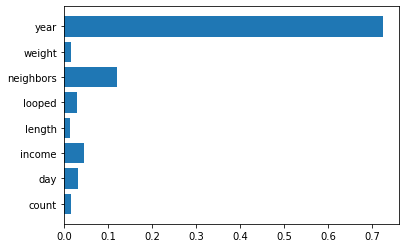

In [ ]:
import xgboost as xgb
model_xgb_1 = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 9, min_child_weight = 1, n_estimators = 1500, tree_method = 'gpu_hist')
model_xgb_1.fit(X_train, y_train)
y_pred_xgb_1 = model_xgb_1.predict(X_test)

from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, y_pred_xgb_1)
acc = accuracy_score(y_test, y_pred_xgb_1)
f1_score = f1_score(y_test, y_pred_xgb_1,average='weighted')
recall = recall_score(y_test, y_pred_xgb_1,average='weighted')
precision = precision_score(y_test, y_pred_xgb_1,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

import collections
importance_xgb_1 = list(model_xgb_1.feature_importances_)
feat_imp_xgb_1 = dict(zip(data.loc[:, data.columns != 'label'].columns, importance_xgb_1))
feat_imp_xgb_1 = collections.OrderedDict(sorted(feat_imp_xgb_1.items()))
keys_xgb_1 = feat_imp_xgb_1.keys()
values_xgb_1 = feat_imp_xgb_1.values()
plt.barh(list(keys_xgb_1), list(values_xgb_1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf_1 = RandomForestClassifier(n_estimators = 250)
model_rf_1.fit(X_train, y_train)
y_pred_rf_1 = model_rf_1.predict(X_test)

from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, y_pred_rf_1)
acc = accuracy_score(y_test, y_pred_rf_1)
f1_score = f1_score(y_test, y_pred_rf_1,average='weighted')
recall = recall_score(y_test, y_pred_rf_1,average='weighted')
precision = precision_score(y_test, y_pred_rf_1,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

import collections
importance_rf_1 = list(model_rf_1.feature_importances_)
feat_imp_rf_1 = dict(zip(data.loc[:, data.columns != 'label'].columns, importance_rf_1))
feat_imp_rf_1 = collections.OrderedDict(sorted(feat_imp_rf_1.items()))
keys_rf_1 = feat_imp_rf_1.keys()
values_rf_1 = feat_imp_rf_1.values()
plt.barh(list(keys_rf_1), list(values_rf_1))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model_etc_1 = ExtraTreesClassifier(max_features='log2',min_samples_split=3)
model_etc_1.fit(X_train, y_train)
y_pred_etc_1 = model_etc_1.predict(X_test)

from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, recall_score, precision_score
mae = mean_absolute_error(y_test, y_pred_etc_1)
acc = accuracy_score(y_test, y_pred_etc_1)
f1_score = f1_score(y_test, y_pred_etc_1,average='weighted')
recall = recall_score(y_test, y_pred_etc_1,average='weighted')
precision = precision_score(y_test, y_pred_etc_1,average='weighted')
print("Mean Absolute Error : ",mae)
print("Accuracy: ",acc)
print("Recall: ",recall)
print("Precision: ",precision)
print("F1-score: ",f1_score)

import collections
importance_etc_1 = list(model_etc_1.feature_importances_)
feat_imp_etc_1 = dict(zip(data.loc[:, data.columns != 'label'].columns, importance_etc_1))
feat_imp_etc_1 = collections.OrderedDict(sorted(feat_imp_etc_1.items()))
keys_etc_1 = feat_imp_etc_1.keys()
values_etc_1 = feat_imp_etc_1.values()
plt.barh(list(keys_etc_1), list(values_etc_1))

In [ ]:
feat_imp_1 = np.array(list(values_xgb_1)) + np.array(list(values_rf_1)) + np.array(list(values_etc_1))
relative_feat_imp_1 = feat_imp_1/3
plt.barh(list(keys_xgb_1), list(relative_feat_imp_1))

In [ ]:
print(test_labels)
print(len(test_labels))

Reload data for EDA

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_data.csv')   #Change Path to your Drive Directory accordingly.
data = data.drop(['address','Unnamed: 0'],axis = 1)
data["label"]= data["label"].replace(28, "white") 
data["label"]= data["label"].replace('28', "white") 

'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].unique()'''

X = data.loc[:, data.columns != 'label']
y = data['label']
#y = data.loc[:, data.columns == 'label']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(data)
print(X)
print(y)

        year  day  length  ...  neighbors        income            label
0       2017   11      18  ...          2  1.000500e+08  princetonCerber
1       2016  132      44  ...          1  1.000000e+08   princetonLocky
2       2016  246       0  ...          2  2.000000e+08  princetonCerber
3       2016  322      72  ...          2  7.120000e+07  princetonCerber
4       2016  238     144  ...          1  2.000000e+08   princetonLocky
...      ...  ...     ...  ...        ...           ...              ...
315195  2018  330       0  ...          2  2.503180e+09            white
315196  2018  330       0  ...          2  1.000000e+09            white
315197  2018  330       6  ...          1  3.000000e+08            white
315198  2018  330       0  ...          2  1.372746e+09            white
315199  2018  330       6  ...          2  2.397816e+09            white

[315200 rows x 9 columns]
        year  day  length    weight  count  looped  neighbors        income
0       2017   11    

In [ ]:

data['label'].value_counts()

white                          232374
paduaCryptoWall                 24780
montrealCryptoLocker            18630
princetonCerber                 18446
princetonLocky                  13250
montrealCryptXXX                 4838
montrealNoobCrypt                 966
montrealDMALockerv3               708
montrealDMALocker                 502
montrealSamSam                    124
montrealCryptoTorLocker2015       110
montrealGlobeImposter             110
montrealGlobev3                    68
montrealGlobe                      64
montrealWannaCry                   56
montrealRazy                       26
montrealAPT                        22
paduaKeRanger                      20
montrealFlyper                     18
montrealXTPLocker                  16
montrealVenusLocker                14
montrealXLockerv5.0                14
montrealCryptConsole               14
montrealEDA2                       12
montrealJigSaw                      8
paduaJigsaw                         4
montrealSam 

In [ ]:
white = data.loc[data['label']=='white']
paduaCryptoWall = data.loc[data['label']=='paduaCryptoWall']
montrealCryptoLocker = data.loc[data['label']=='montrealCryptoLocker']
princetonCerber = data.loc[data['label']=='princetonCerber']
princetonLocky = data.loc[data['label']=='princetonLocky']
montrealCryptXXX = data.loc[data['label']=='montrealCryptXXX']
montrealNoobCrypt = data.loc[data['label']=='montrealNoobCrypt']
montrealDMALockerv3 = data.loc[data['label']=='montrealDMALockerv3']
montrealDMALocker = data.loc[data['label']=='montrealDMALocker']
montrealSamSam = data.loc[data['label']=='montrealSamSam']
montrealCryptoTorLocker2015 = data.loc[data['label']=='montrealCryptoTorLocker2015']
montrealGlobeImposter = data.loc[data['label']=='montrealGlobeImposter']
montrealGlobev3 = data.loc[data['label']=='montrealGlobev3']
montrealGlobe = data.loc[data['label']=='montrealGlobe']
montrealWannaCry = data.loc[data['label']=='montrealWannaCry']
montrealRazy = data.loc[data['label']=='montrealRazy']
montrealAPT = data.loc[data['label']=='montrealAPT']
paduaKeRanger = data.loc[data['label']=='paduaKeRanger']
montrealFlyper = data.loc[data['label']=='montrealFlyper']
montrealXTPLocker = data.loc[data['label']=='montrealXTPLocker']
montrealVenusLocker = data.loc[data['label']=='montrealVenusLocker']
montrealCryptConsole = data.loc[data['label']=='montrealCryptConsole']
montrealXLockerv5 = data.loc[data['label']=='montrealXLockerv5']
montrealEDA2 = data.loc[data['label']=='montrealEDA2']
montrealJigSaw = data.loc[data['label']=='montrealJigSaw']
paduaJigsaw = data.loc[data['label']=='paduaJigsaw']
montrealXLocker = data.loc[data['label']=='montrealXLocker']
montrealSam = data.loc[data['label']=='montrealSam']
montrealComradeCircle = data.loc[data['label']=='montrealComradeCircle']

In [ ]:
print(white)
print(paduaCryptoWall)
print(montrealCryptoLocker)
print(princetonCerber)
print(princetonLocky)
print(montrealCryptXXX)
print(montrealNoobCrypt)
print(montrealDMALockerv3)
print(montrealDMALocker)
print(montrealSamSam)
print(montrealCryptoTorLocker2015)
print(montrealGlobeImposter)
print(montrealGlobev3)
print(montrealGlobe)
print(montrealWannaCry)
print(montrealRazy)
print(montrealAPT)
print(paduaKeRanger)
print(montrealFlyper)
print(montrealXTPLocker)
print(montrealVenusLocker)
print(montrealCryptConsole)
print(montrealXLockerv5)
print(montrealEDA2)
print(montrealJigSaw)
print(paduaJigsaw)
print(montrealXLocker)
print(montrealSam)
print(montrealComradeCircle)

        year  day  length    weight  ...  looped  neighbors        income  label
82826   2011    1       0  1.000000  ...       0          1  5.000000e+09  white
82827   2011    1       0  1.000000  ...       0          2  5.000000e+09  white
82828   2011    1       0  1.000000  ...       0          2  9.150000e+08  white
82829   2011    1       0  1.000000  ...       0          2  3.402500e+10  white
82830   2011    1       0  1.000000  ...       0          2  1.275100e+10  white
...      ...  ...     ...       ...  ...     ...        ...           ...    ...
315195  2018  330       0  0.111111  ...       0          2  2.503180e+09  white
315196  2018  330       0  0.500000  ...       0          2  1.000000e+09  white
315197  2018  330       6  0.020092  ...       0          1  3.000000e+08  white
315198  2018  330       0  0.333333  ...       0          2  1.372746e+09  white
315199  2018  330       6  1.000000  ...       0          2  2.397816e+09  white

[232374 rows x 9 columns]
 

In [ ]:
white=white.replace('white','white')
paduaCryptoWall=paduaCryptoWall.replace('paduaCryptoWall','CryptoWall')
montrealCryptoLocker=montrealCryptoLocker.replace('montrealCryptoLocker','CryptoLocker')
princetonCerber=princetonCerber.replace('princetonCerber','Cerber')
princetonLocky=princetonLocky.replace('princetonLocky','Locky')
montrealCryptXXX=montrealCryptXXX.replace('montrealCryptXXX','CryptXXX')
montrealNoobCrypt=montrealNoobCrypt.replace('montrealNoobCrypt','NoobCrypt')
montrealDMALockerv3=montrealDMALockerv3.replace('montrealDMALockerv3','DMA Lockerv3')
montrealDMALocker=montrealDMALocker.replace('montrealDMALocker','DMA Locker')
montrealSamSam=montrealSamSam.replace('montrealSamSam','SamSam')
montrealCryptoTorLocker2015=montrealCryptoTorLocker2015.replace('montrealCryptoTorLocker2015','CryptoTorLocker2015')
montrealGlobeImposter=montrealGlobeImposter.replace('montrealGlobeImposter','GlobeImposter')
montrealGlobev3=montrealGlobev3.replace('montrealGlobev3','Globev3')
montrealGlobe=montrealGlobe.replace('montrealGlobe','Globe')
montrealWannaCry=montrealWannaCry.replace('montrealWannaCry','WannaCry')
montrealRazy=montrealRazy.replace('montrealRazy','Razy')
montrealAPT=montrealAPT.replace('montrealAPT','APT')
paduaKeRanger=paduaKeRanger.replace('paduaKeRanger','KeRanger')
montrealFlyper=montrealFlyper.replace('montrealFlyper','Flyper')
montrealXTPLocker=montrealXTPLocker.replace('montrealXTPLocker','XTP Locker')
montrealVenusLocker=montrealVenusLocker.replace('montrealVenusLocker','Venus Locker')
montrealCryptConsole=montrealCryptConsole.replace('montrealCryptConsole','CryptConsole')
montrealXLockerv5=montrealXLockerv5.replace('montrealXLockerv5','XLockerv5')
montrealEDA2=montrealEDA2.replace('montrealEDA2','EDA2')
montrealJigSaw=montrealJigSaw.replace('montrealJigSaw','JigSaw')
paduaJigsaw=paduaJigsaw.replace('paduaJigsaw','Jigsaw')
montrealXLocker=montrealXLocker.replace('montrealXLocker','XLocker')
montrealSam=montrealSam.replace('montrealSam','Sam')
montrealComradeCircle=montrealComradeCircle.replace('montrealComradeCircle','Comrade Circle')

In [ ]:
'''white.to_csv('/content/drive/MyDrive/Bitcoin Heist/white.csv',index=False)
paduaCryptoWall.to_csv('/content/drive/MyDrive/Bitcoin Heist/paduaCryptoWall.csv',index=False)
montrealCryptoLocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealCryptoLocker.csv',index=False)
princetonCerber.to_csv('/content/drive/MyDrive/Bitcoin Heist/princetonCerber.csv',index=False)
princetonLocky.to_csv('/content/drive/MyDrive/Bitcoin Heist/princetonLocky.csv',index=False)
montrealCryptXXX.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealCryptXXX.csv',index=False)
montrealNoobCrypt.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealNoobCrypt.csv',index=False)
montrealDMALockerv3.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealDMALockerv3.csv',index=False)
montrealDMALocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealDMALocker.csv',index=False)
montrealSamSam.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealSamSam.csv',index=False)
montrealCryptoTorLocker2015.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealCryptoTorLocker2015.csv',index=False)
montrealGlobeImposter.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealGlobeImposter.csv',index=False)
montrealGlobev3.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealGlobev3.csv',index=False)
montrealGlobe.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealGlobe.csv',index=False)
montrealWannaCry.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealWannaCry.csv',index=False)
montrealRazy.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealRazy.csv',index=False)
montrealAPT.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealAPT.csv',index=False)
paduaKeRanger.to_csv('/content/drive/MyDrive/Bitcoin Heist/paduaKeRanger.csv',index=False)
montrealFlyper.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealFlyper.csv',index=False)
montrealXTPLocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealXTPLocker.csv',index=False)
montrealVenusLocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealVenusLocker.csv',index=False)
montrealCryptConsole.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealCryptConsole.csv',index=False)
montrealXLockerv5.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealXLockerv5.csv',index=False)
montrealEDA2.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealEDA2.csv',index=False)
montrealJigSaw.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealJigSaw.csv',index=False)
paduaJigsaw.to_csv('/content/drive/MyDrive/Bitcoin Heist/paduaJigsaw.csv',index=False)
montrealXLocker.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealXLocker.csv',index=False)
montrealSam.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealSam.csv',index=False)
montrealComradeCircle.to_csv('/content/drive/MyDrive/Bitcoin Heist/montrealComradeCircle.csv',index=False)'''

In [ ]:
montrealRazy['neighbors'].unique()

array([ 1, 64,  2, 30, 27])

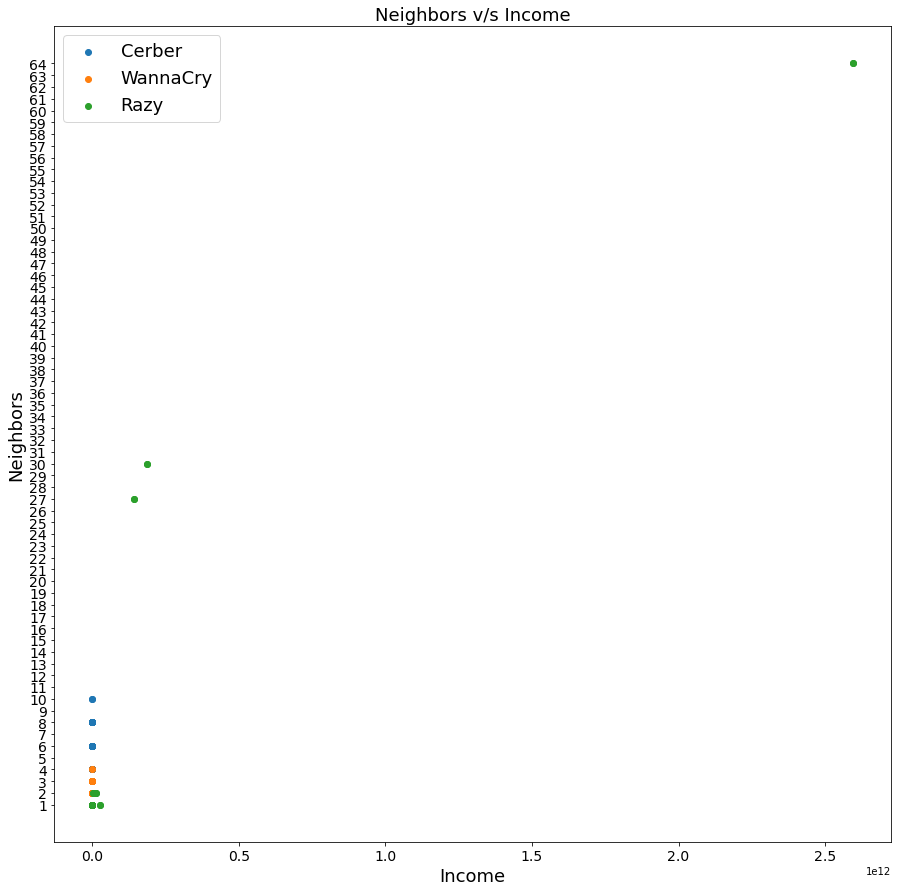

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1=princetonCerber["income"]                              
y1=princetonCerber["neighbors"]                       
x2=montrealWannaCry["income"]                              
y2=montrealWannaCry["neighbors"]  
x3=montrealRazy["income"]                              
y3=montrealRazy["neighbors"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('Neighbors v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('Neighbors', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['Cerber','WannaCry','Razy'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

In [ ]:
montrealFlyper                     18
montrealXTPLocker                  16
montrealVenusLocker                14
montrealXLockerv5.0                14
montrealCryptConsole               14
montrealEDA2                       12
montrealJigSaw                      8
paduaJigsaw                         4

SyntaxError: ignored

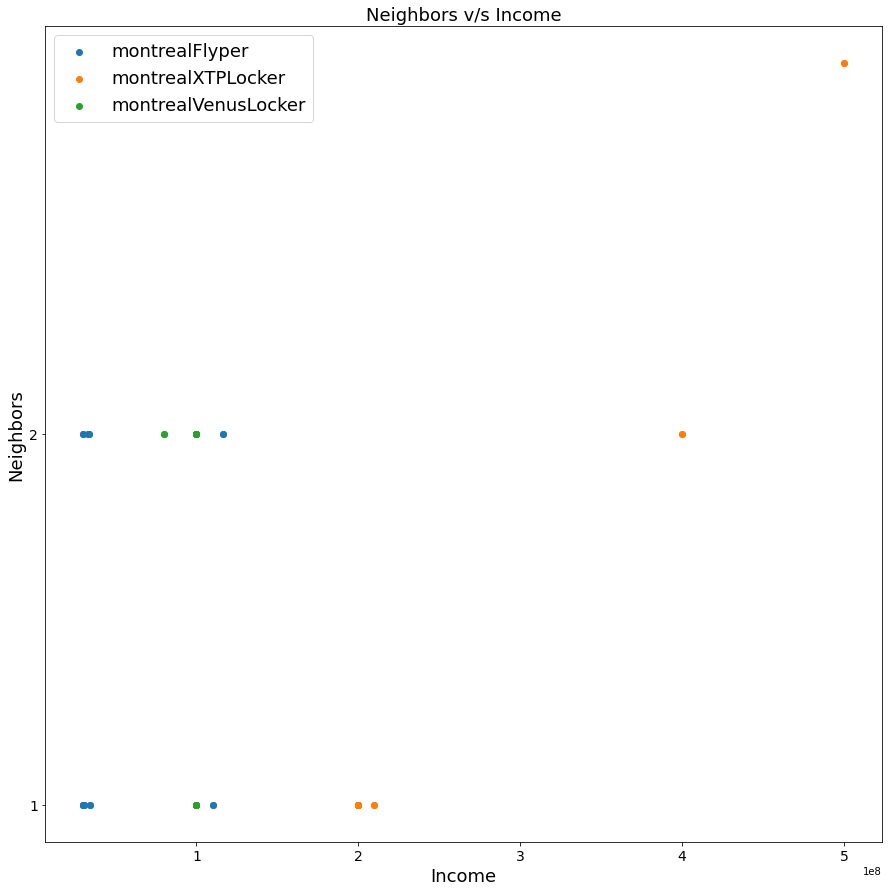

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealFlyper["income"]                              
y1 = montrealFlyper["neighbors"]                       
x2 = montrealXTPLocker["income"]                              
y2 = montrealXTPLocker["neighbors"]  
x3 = montrealVenusLocker["income"]                              
y3 = montrealVenusLocker["neighbors"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('Neighbors v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('Neighbors', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['Cerber','montrealXTPLocker','montrealVenusLocker'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

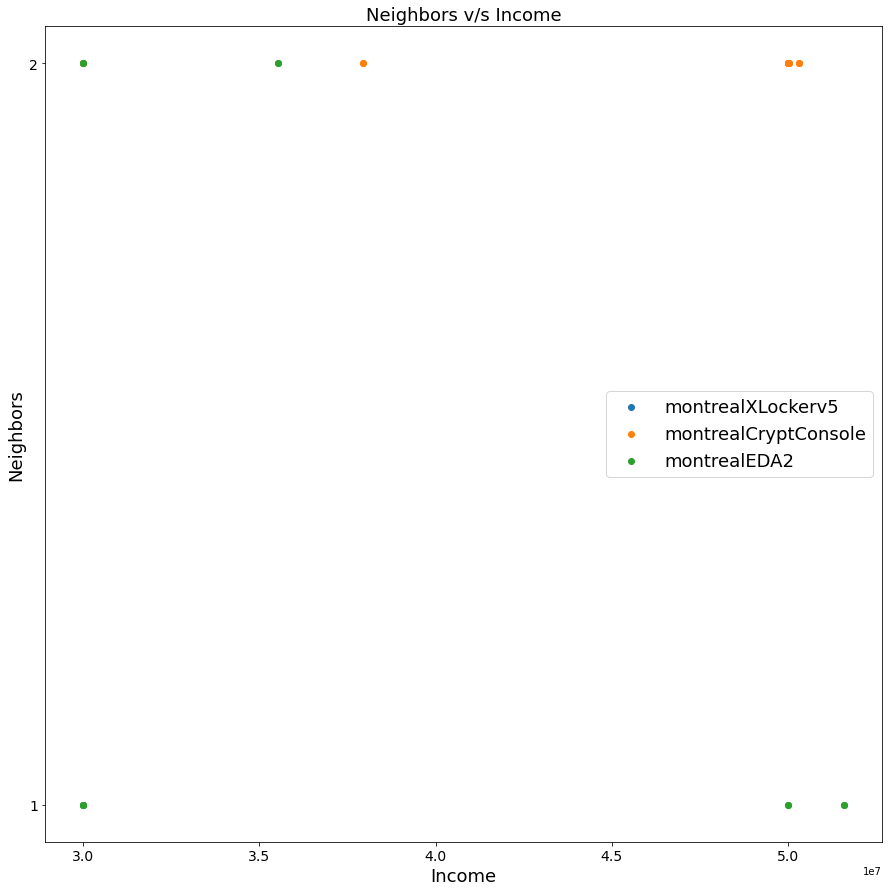

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealXLockerv5["income"]                              
y1 = montrealXLockerv5["neighbors"]                       
x2 = montrealCryptConsole["income"]                              
y2 = montrealCryptConsole["neighbors"]  
x3 = montrealEDA2["income"]                              
y3 = montrealEDA2["neighbors"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('Neighbors v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('Neighbors', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['montrealXLockerv5','montrealCryptConsole','montrealEDA2'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

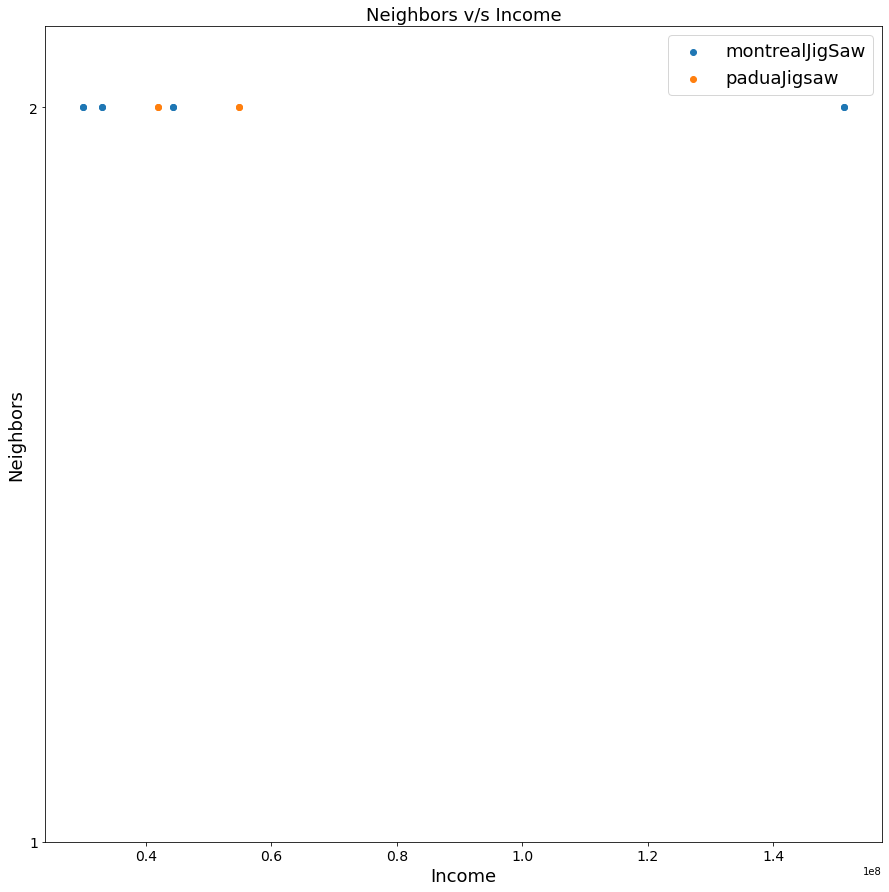

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealJigSaw["income"]                              
y1 = montrealJigSaw["neighbors"]                       
x2 = paduaJigsaw["income"]                              
y2 = paduaJigsaw["neighbors"]     
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)                
plt.title('Neighbors v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('Neighbors', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['montrealJigSaw','paduaJigsaw'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

In [ ]:
X

,year,day,length,weight,count,looped,neighbors,income
0,2017,11,18,0.008333,1,0,2,1.000500e+08
1,2016,132,44,0.000244,1,0,1,1.000000e+08
2,2016,246,0,1.000000,1,0,2,2.000000e+08
3,2016,322,72,0.003906,1,0,2,7.120000e+07
4,2016,238,144,0.072848,456,0,1,2.000000e+08
...,...,...,...,...,...,...,...,...
315195,2018,330,0,0.111111,1,0,2,2.503180e+09
315196,2018,330,0,0.500000,1,0,2,1.000000e+09
315197,2018,330,6,0.020092,2,0,1,3.000000e+08
315198,2018,330,0,0.333333,1,0,2,1.372746e+09


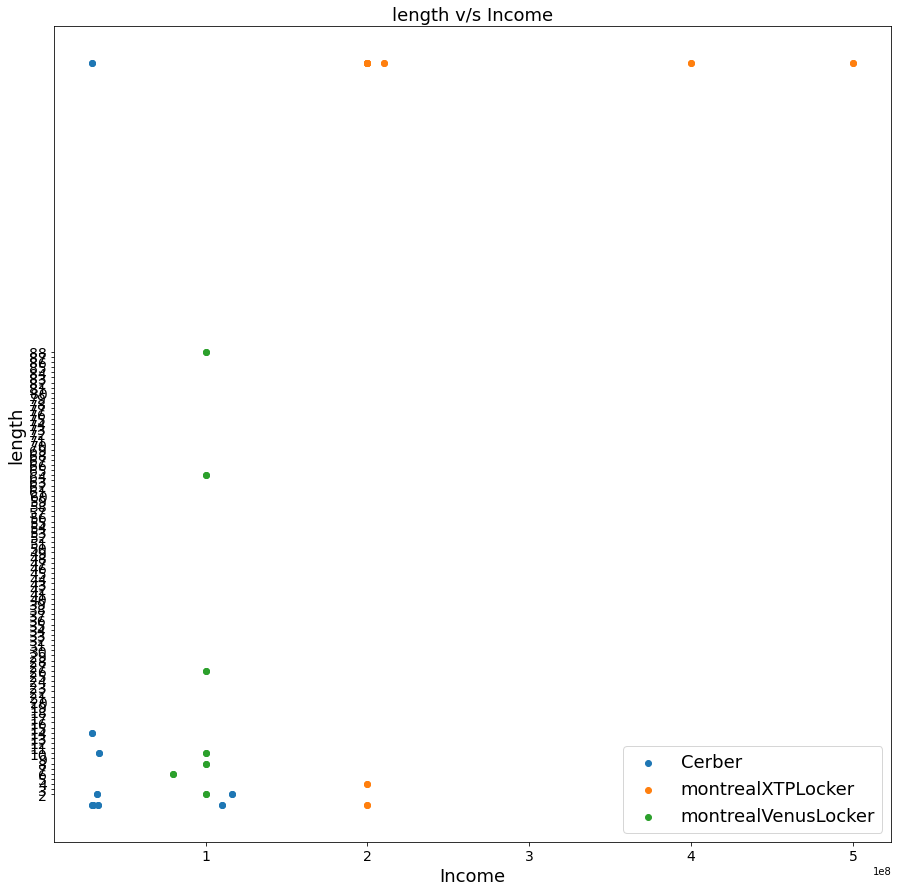

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealFlyper["income"]                              
y1 = montrealFlyper["length"]                       
x2 = montrealXTPLocker["income"]                              
y2 = montrealXTPLocker["length"]  
x3 = montrealVenusLocker["income"]                              
y3 = montrealVenusLocker["length"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('length v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('length', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['Cerber','montrealXTPLocker','montrealVenusLocker'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

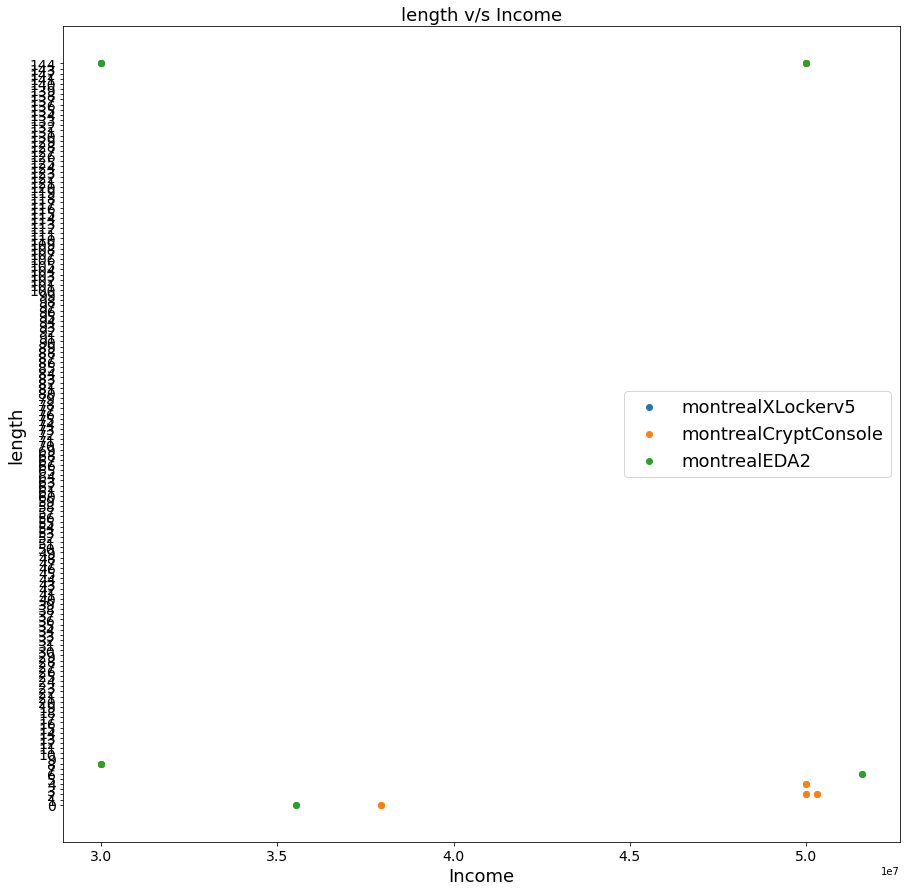

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealXLockerv5["income"]                              
y1 = montrealXLockerv5["length"]                       
x2 = montrealCryptConsole["income"]                              
y2 = montrealCryptConsole["length"]  
x3 = montrealEDA2["income"]                              
y3 = montrealEDA2["length"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('length v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('length', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['montrealXLockerv5','montrealCryptConsole','montrealEDA2'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

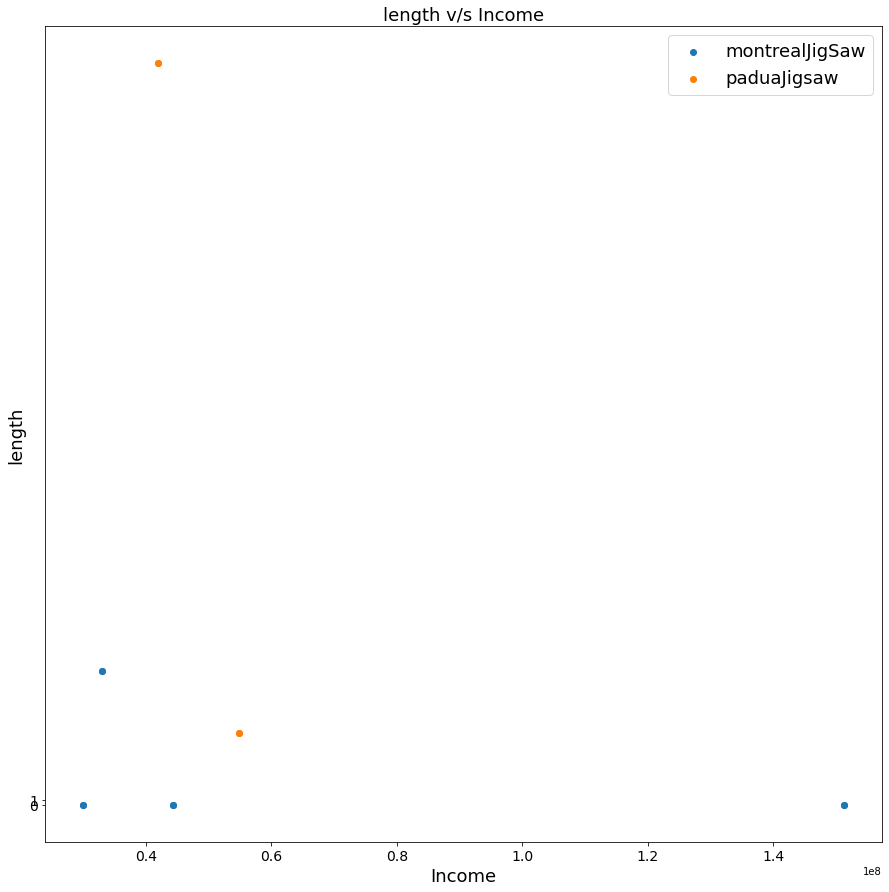

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealJigSaw["income"]                              
y1 = montrealJigSaw["length"]                       
x2 = paduaJigsaw["income"]                              
y2 = paduaJigsaw["length"]     
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)                
plt.title('length v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('length', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['montrealJigSaw','paduaJigsaw'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

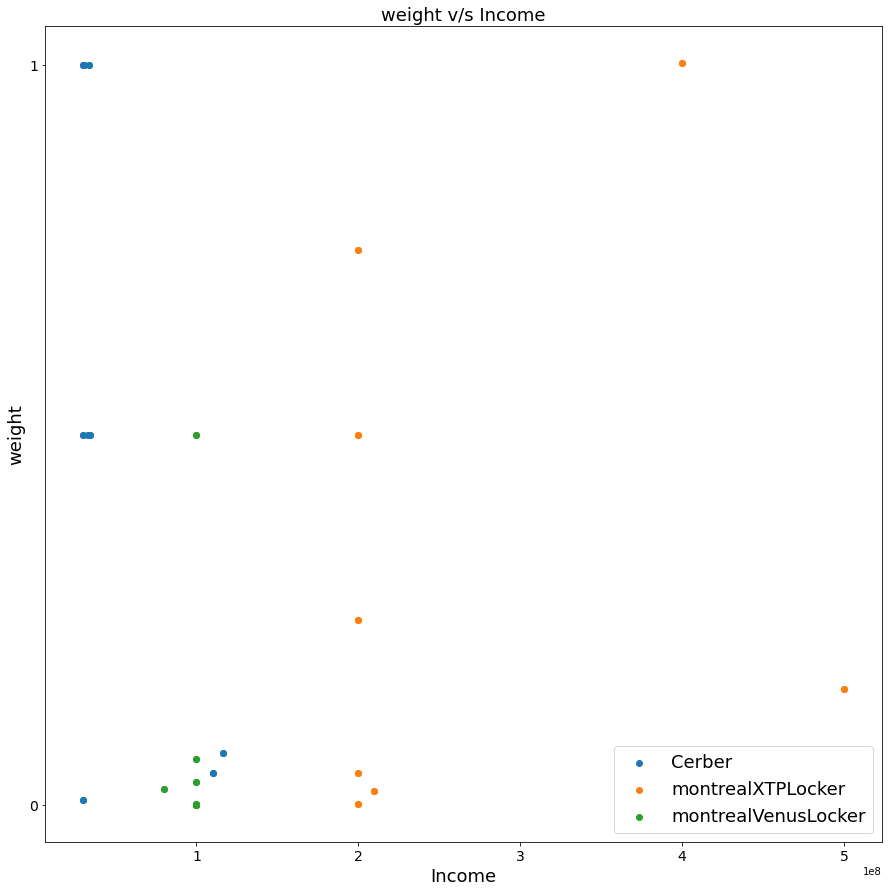

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealFlyper["income"]                              
y1 = montrealFlyper["weight"]                       
x2 = montrealXTPLocker["income"]                              
y2 = montrealXTPLocker["weight"]  
x3 = montrealVenusLocker["income"]                              
y3 = montrealVenusLocker["weight"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('weight v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('weight', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['Cerber','montrealXTPLocker','montrealVenusLocker'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

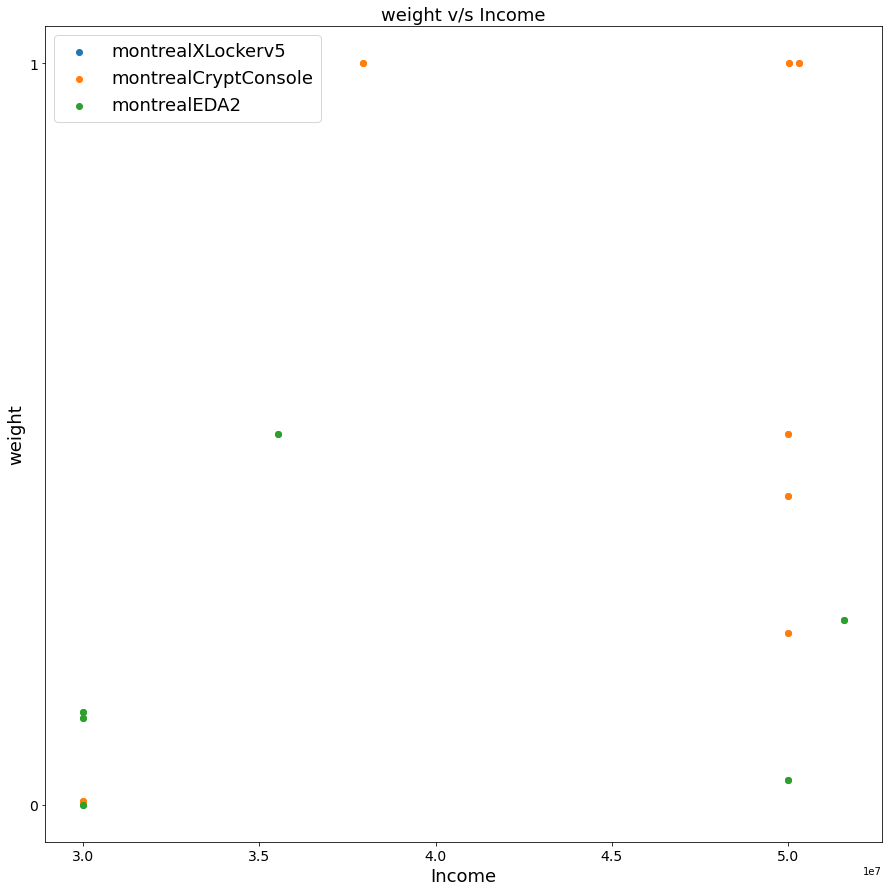

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealXLockerv5["income"]                              
y1 = montrealXLockerv5["weight"]                       
x2 = montrealCryptConsole["income"]                              
y2 = montrealCryptConsole["weight"]  
x3 = montrealEDA2["income"]                              
y3 = montrealEDA2["weight"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('weight v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('weight', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['montrealXLockerv5','montrealCryptConsole','montrealEDA2'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

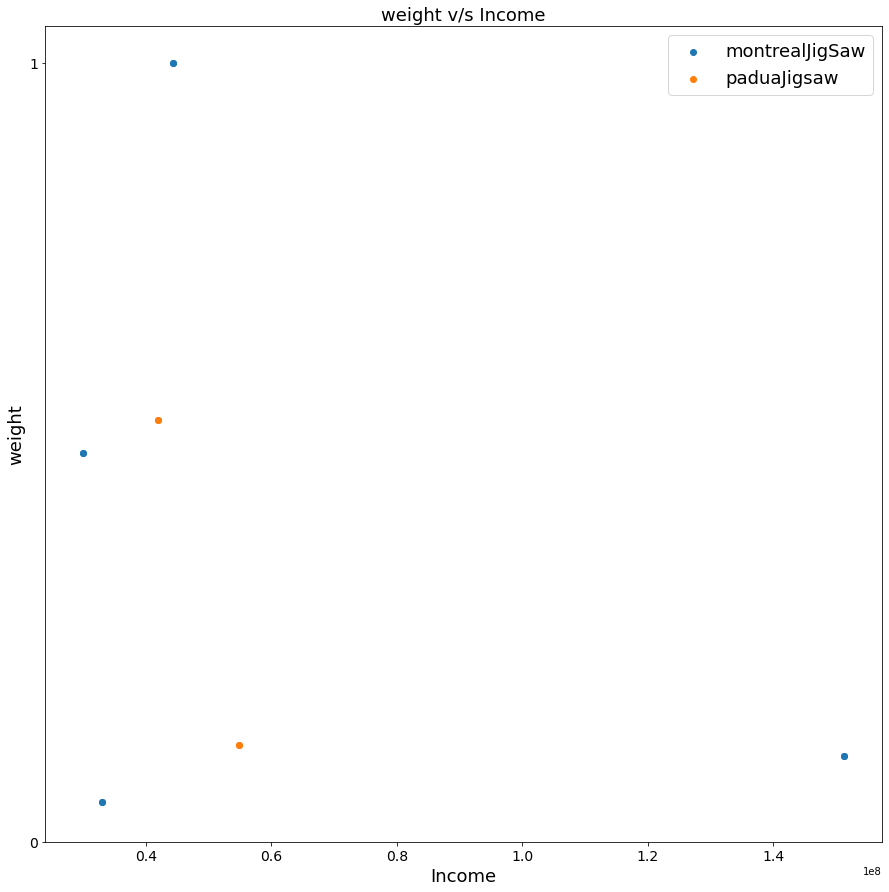

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealJigSaw["income"]                              
y1 = montrealJigSaw["weight"]                       
x2 = paduaJigsaw["income"]                              
y2 = paduaJigsaw["weight"]     
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)                
plt.title('weight v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('weight', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['montrealJigSaw','paduaJigsaw'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

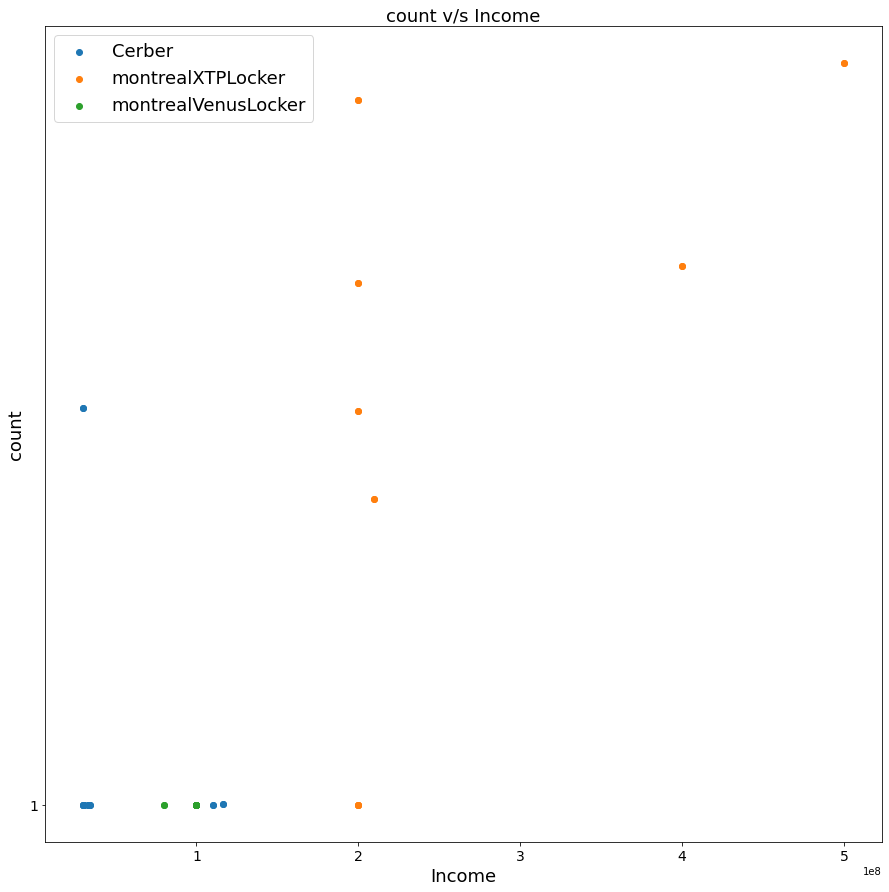

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealFlyper["income"]                              
y1 = montrealFlyper["count"]                       
x2 = montrealXTPLocker["income"]                              
y2 = montrealXTPLocker["count"]  
x3 = montrealVenusLocker["income"]                              
y3 = montrealVenusLocker["count"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('count v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('count', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['Cerber','montrealXTPLocker','montrealVenusLocker'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

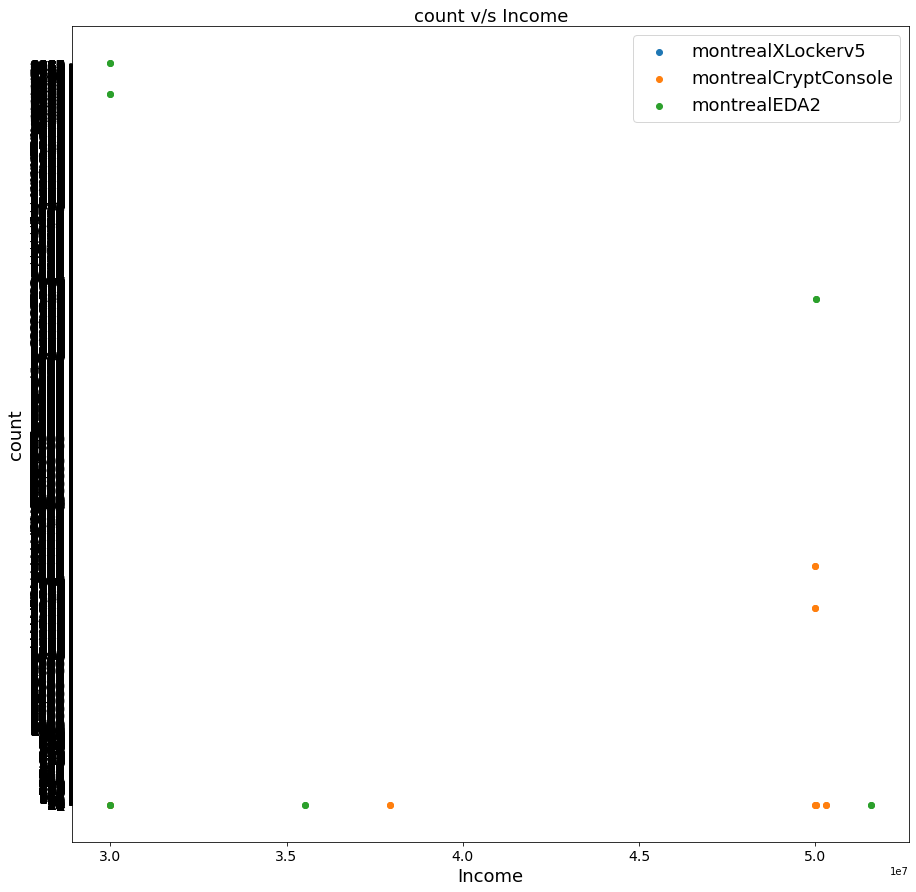

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealXLockerv5["income"]                              
y1 = montrealXLockerv5["count"]                       
x2 = montrealCryptConsole["income"]                              
y2 = montrealCryptConsole["count"]  
x3 = montrealEDA2["income"]                              
y3 = montrealEDA2["count"]    
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)
plot3=plt.scatter(x3,y3)                
plt.title('count v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('count', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['montrealXLockerv5','montrealCryptConsole','montrealEDA2'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()

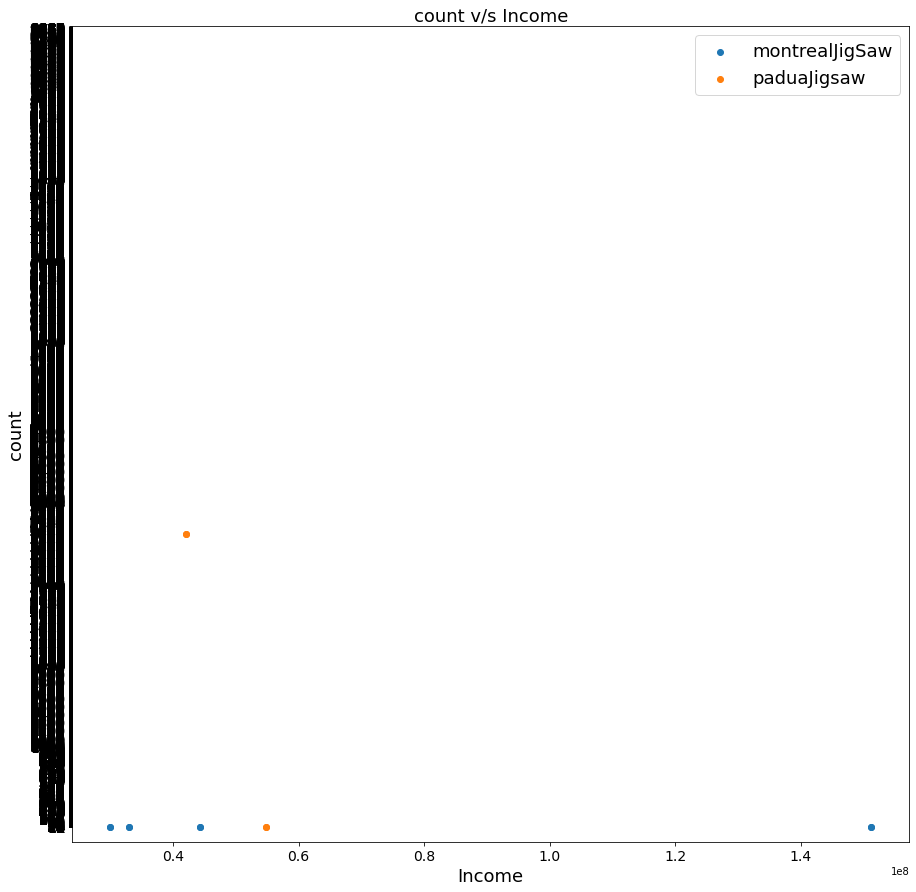

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 15),facecolor='w', edgecolor='k')
x1 = montrealJigSaw["income"]                              
y1 = montrealJigSaw["count"]                       
x2 = paduaJigsaw["income"]                              
y2 = paduaJigsaw["count"]     
plot1=plt.scatter(x1,y1)
plot2=plt.scatter(x2,y2)                
plt.title('count v/s Income', fontsize=18)
plt.xlabel('Income', fontsize=18)
plt.xticks(fontsize=14)      
plt.ylabel('count', fontsize=18)
plt.yticks(np.arange(min(y3), max(y3)+1, 1.0),fontsize=14)      #Select Max Range for y axis.       Increase step count if RAM crashes
plt.legend(handles=[plot1,plot2,plot3],labels=['montrealJigSaw','paduaJigsaw'], fontsize=18)
plt.savefig('Plot')                             #Download the plot in colab. Check Files section of colab.
plt.show()